In [16]:
import pandas as pd

df = pd.read_csv('/content/sample_data/twitter_result.csv')

In [17]:
# Check DataFrame shape and head
print(df.shape)
print(df.head())

# Examine data types
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Basic statistics for numerical columns
print(df.describe())

(50, 6)
               created                                               text  \
0  2017-10-23 10:38:38  b'RT @NicholasRyanH: Game of Thrones tonight!!...   
1  2017-10-23 10:38:18  b'RT @guardian: Gunpowder review \xe2\x80\x93 ...   
2  2017-10-23 10:37:50  b"RT @monkeys_robots: #Podcast Rewind - Episod...   
3  2017-10-23 10:37:45  b'@Eyilayoo Game of Thrones people have borrow...   
4  2017-10-23 10:36:53  b'RT @jsleosz: Game of Thrones https://t.co/h0...   

   retwc  hashtag  followers  friends  
0    349      NaN        548      889  
1      9      NaN       1962      906  
2      1  Podcast         59     2270  
3      0      NaN       1727     1984  
4      3      NaN        554      250  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   created    50 non-null     object
 1   text       50 non-null     object
 2   retwc      50 non-null    

In [18]:
df.drop('hashtag', axis=1, inplace=True)


In [19]:
df.duplicated().sum()

0

In [22]:
import re

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df['text'] = df['text'].apply(remove_urls)

In [23]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\bRT\b', '', text)  # Remove 'RT' (retweet indicator)
    return text

df['text'] = df['text'].apply(clean_text)



In [24]:
categories = {
    'health': ['health', 'fitness', 'workout', 'nutrition', 'wellness'],
    'tech': ['technology', 'tech', 'gadget', 'AI', 'software', 'programming'],
    'family': ['family', 'kids', 'children', 'parenting', 'home'],
    'food': ['food', 'cooking', 'recipe', 'restaurant', 'cuisine'],
    'travel': ['travel', 'vacation', 'trip', 'destination', 'adventure'],
    'sports': ['sports', 'football', 'basketball', 'soccer', 'tennis'],
    'entertainment': ['entertainment', 'movie', 'music', 'show', 'concert'],
    'news': ['news', 'current events', 'politics', 'world', 'breaking'],
    'fashion': ['fashion', 'style', 'clothing', 'beauty', 'trend'],
    'business': ['business', 'finance', 'marketing', 'economy', 'startup']
}

In [25]:
def categorize_tweet(text):
    for category, keywords in categories.items():
        if any(keyword in text.lower() for keyword in keywords):
            return category
    return 'other'  # If no keywords match, categorize as 'other'

df['category'] = df['text'].apply(categorize_tweet)

In [26]:
# Group the DataFrame by category
grouped_df = df.groupby('category')

# Calculate descriptive statistics for retweet count
retweet_stats = grouped_df['retwc'].agg(['mean', 'median', 'std', 'size'])
print("Retweet Statistics by Category:\n", retweet_stats)

# Calculate average and distribution of tweet lengths
tweet_length_stats = grouped_df['text'].apply(lambda x: x.str.len()).agg(['mean', 'std'])
print("\nTweet Length Statistics by Category:\n", tweet_length_stats)



Retweet Statistics by Category:
                      mean  median         std  size
category                                           
entertainment    0.000000     0.0         NaN     1
other          138.653061     2.0  646.799993    49

Tweet Length Statistics by Category:
 mean    100.400000
std      31.318639
Name: text, dtype: float64


In [27]:
# Calculate average retweet count and tweet length for each category
retweet_stats = df.groupby('category')['retwc'].agg(['mean', 'median', 'std', 'size'])
tweet_length_stats = df.groupby('category')['text'].apply(lambda x: x.str.len().mean()).to_frame(name='mean')
tweet_length_stats['std'] = df.groupby('category')['text'].apply(lambda x: x.str.len().std())

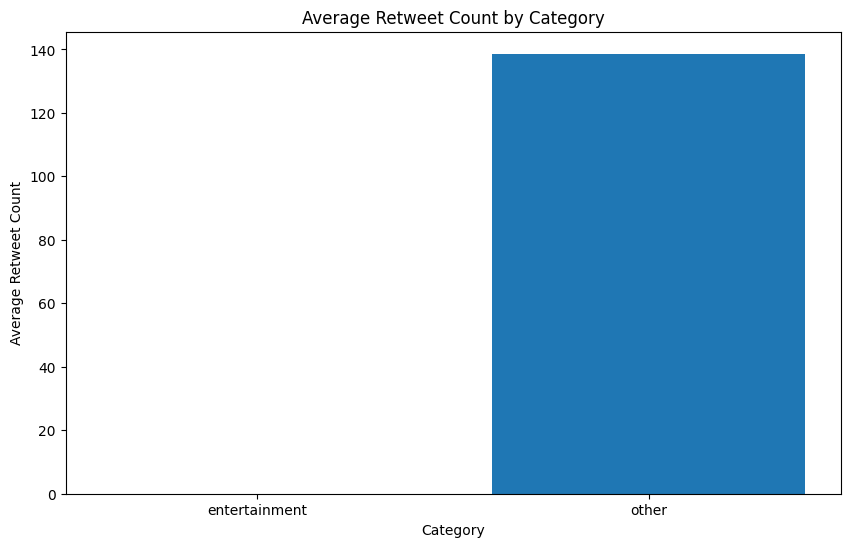

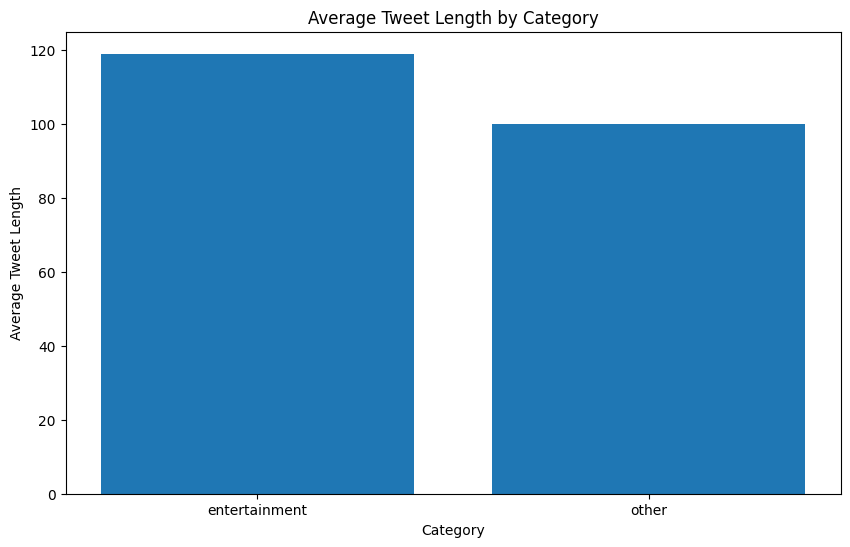

In [28]:
# Create bar charts for average retweet count and tweet length
plt.figure(figsize=(10, 6))
plt.bar(retweet_stats.index, retweet_stats['mean'])
plt.xlabel('Category')
plt.ylabel('Average Retweet Count')
plt.title('Average Retweet Count by Category')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(tweet_length_stats.index, tweet_length_stats['mean'])
plt.xlabel('Category')
plt.ylabel('Average Tweet Length')
plt.title('Average Tweet Length by Category')
plt.show()


In [29]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [30]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True